## Help Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def is_array(matrix): 
    return isinstance(matrix, np.ndarray)

def is_bool(value): 
    return isinstance(value, np.bool_)

def is_non_negative_int(value): 
    return (isinstance(value, int) and value >= 0)

def is_inf(value): 
    return value == float("inf")

## Game of Life

##### Check whether the board is valid

In [2]:
def is_valid_board(board):
    '''
        Function checks whether a matrix is a valid "Game of Life" board (all values are booleans, type, etc.)
        
        input:
            board: matrix
        output:
            True/False: board is valid or not
    '''
    
    if not is_array(board):
        return False
        
    for row in board:
        # row should be a type of ndarray
        if not is_array(row):
            return False
        
        for cell in row:
            # check if cell is bool
            if not is_bool(cell):
                return False
        
    return True

In [3]:
example = np.array([[True,True], [False, False], [False, False]])
is_valid_board(example)

True

##### Generate the next step

In [4]:
# helpful functions
def get_left(idx_j, j_shape):
    if idx_j == 0:
        idx_j = j_shape - 1
    else:
        idx_j -= 1
    
    return idx_j

def get_right(idx_j, j_shape):
    if idx_j == j_shape - 1:
        idx_j = 0
    else:
        idx_j += 1
    
    return idx_j

def get_top(idx_i, i_shape):
    if idx_i == 0:
        idx_i = i_shape - 1
    else:
        idx_i -= 1
    
    return idx_i

def get_bottom(idx_i, i_shape):
    if idx_i == i_shape - 1:
        idx_i = 0
    else:
        idx_i += 1
    
    return idx_i

In [5]:
def gol_step(board):
    '''
        Function generates the next step of a board using "Game of Life" rules
        
        input:
            board: matrix
        output:
            ndarray: board of a next step
    '''
    
    if not is_valid_board(board):
        raise ValueError('Provided board is not a valid "Game of Life" board')
        
    # copy board
    next_step_board = np.array(board)
    # the board is ixj shape
    i_shape = board.shape[0]
    j_shape = board.shape[1]
        
    for idx_i in range(0, i_shape):
        for idx_j in range(0, j_shape):
            # gen number of alive neighbours
            alive_neighbours = 0
            
            # left
            alive_neighbours += board[idx_i][get_left(idx_j, j_shape)]
            # right
            alive_neighbours += board[idx_i][get_right(idx_j, j_shape)]
            # top
            alive_neighbours += board[get_top(idx_i, i_shape)][idx_j]
            # bottom
            alive_neighbours += board[get_bottom(idx_i, i_shape)][idx_j]
            
            # top-left
            alive_neighbours += board[get_top(idx_i, i_shape)][get_left(idx_j, j_shape)]
            # top-right
            alive_neighbours += board[get_top(idx_i, i_shape)][get_right(idx_j, j_shape)]
            # bottom-left
            alive_neighbours += board[get_bottom(idx_i, i_shape)][get_left(idx_j, j_shape)]
            # bottom-right
            alive_neighbours += board[get_bottom(idx_i, i_shape)][get_right(idx_j, j_shape)]
                
                
            # RULES APPLIED
            # alive and < 2 => dead
            if (board[idx_i][idx_j] == True) and (alive_neighbours < 2):
                next_step_board[idx_i][idx_j] = False
                
            # alive and > 3 => dead
            if (board[idx_i][idx_j] == True) and (alive_neighbours > 3):
                next_step_board[idx_i][idx_j] = False
            
            # dead and 3 => alive
            if (board[idx_i][idx_j] == False) and (alive_neighbours == 3):
                next_step_board[idx_i][idx_j] = True
                
    # return next step board
    return next_step_board

In [6]:
example = np.array([[False, False, False, False, False], 
                    [False, False, True,  False, False], 
                    [False, True,  True,  True,  False], 
                    [False, True,  False, True,  False],
                    [False, False, False, False, False]])

print(np.array(example, dtype=int), "\n")
print(np.array(gol_step(example), dtype=int))

[[0 0 0 0 0]
 [0 0 1 0 0]
 [0 1 1 1 0]
 [0 1 0 1 0]
 [0 0 0 0 0]] 

[[0 0 0 0 0]
 [0 1 1 1 0]
 [0 1 0 1 0]
 [0 1 0 1 0]
 [0 0 0 0 0]]


##### For drawing

In [7]:
from matplotlib.colors import ListedColormap
from matplotlib.pyplot import figure

def draw_gol_board(board):
    '''
        Function creates and shows a plot of a board of "Game of Life"
        
        input:
            board: matrix
        output:
            None
    '''

    if not is_valid_board(board):
        raise ValueError('Provided board is not a valid "Game of Life" board')
            
    # convert boolean-type matrix to int-type matrix
    image = np.array(board, dtype=int)
                
    # change the colormap of an image
    cmap = ListedColormap(['w', 'k'])
    plt.matshow(image, cmap=cmap)
    
    # remove labels
    plt.tick_params(axis='x', bottom=False, top=False, labeltop=False, labelbottom=False)
    plt.tick_params(axis='y', left=False, right=False, labelleft=False, labelright=False)
    
    plt.show()

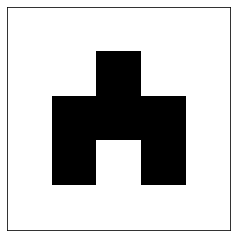

In [8]:
draw_gol_board(example)

##### Create an example matrix

In [9]:
example = np.zeros((20, 20), dtype=bool)
example[1][2] = True
example[2][3] = True
example[3][1] = True
example[3][2] = True
example[3][3] = True
example[3][2] = True

example[13][3] = True
example[13][2] = True
example[13][1] = True
example[14][1] = True
example[12][1] = True


example[1][17] = True
example[2][16] = True
example[3][18] = True
example[3][17] = True
example[3][16] = True

##### Plot first 5 steps

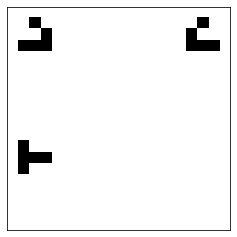

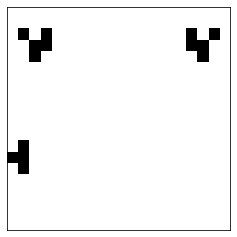

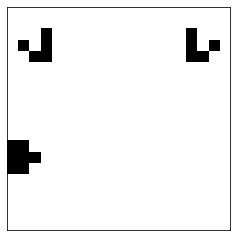

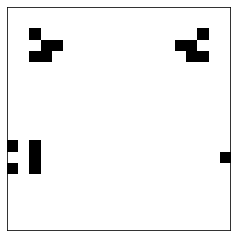

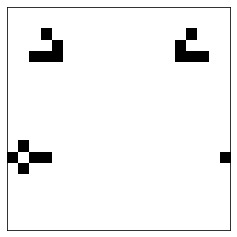

In [10]:
draw_gol_board(example)

step = gol_step(example)
draw_gol_board(step)

step = gol_step(step)
draw_gol_board(step)

step = gol_step(step)
draw_gol_board(step)

step = gol_step(step)
draw_gol_board(step)

## Animation

In [11]:
import time
from IPython.display import clear_output

def animation(board, steps):
    '''
        Function generates animation of "Game of Life" given initial board and number of steps.
        Function also handles 'infinity numbers': float("inf")
        
        input:
            board: matrix
            steps: how much steps should the function show
        output:
            None
    '''
    
    if not is_valid_board(board):
        raise ValueError('Provided board is not a valid "Game of Life" board')
    
    if is_inf(steps):
        # if infinity - then handle later
        pass
    else:
        if not is_non_negative_int(steps):
            raise ValueError('Provided board is not a valid "Game of Life" board')
        
    # draw initial board
    new_board = board
    draw_gol_board(new_board)
    # counter
    count = 0

    while count < steps:
        # wait and clear output
        clear_output(wait=True)
        
        new_board = gol_step(new_board)
        draw_gol_board(new_board)
        count += 1

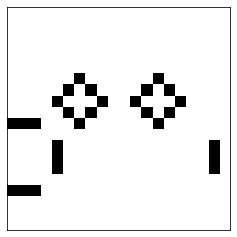

In [12]:
animation(example, 38)

In [ ]:
# for inf. number of time
animation(example, float('inf'))